In [1]:
# Import necessary packages
import networkx as nx
import pickle
import evaluate as ev
import numpy as np

Specify pickle file location here (of graph object list and properties list)

In [2]:
# Path location for saved data
savelocG=r"sliced_data/NEW_connected_cavemen_graphs_100.pkl"
savelocP=r"sliced_data/NEW_connected_cavemen_properties_100.pkl"

# save file for csv (unique to graphs)
#csv_save_loc = savelocG.split('_')[-5]
csv_save_loc =savelocG.split('/')[-1]
csv_save_loc='LPA_'+csv_save_loc + "num-clusters"
print(csv_save_loc)

LPA_NEW_connected_cavemen_graphs_100.pklnum-clusters


In [3]:
# Load data from pickle files
with open(savelocG, "rb") as input_file:
    graphs = pickle.load(input_file)

with open(savelocP, "rb") as input_file:
    properties = pickle.load(input_file)
print(f'Loaded Graphs: {len(graphs)}\nLoaded Properties: {len(properties)}')

Loaded Graphs: 50
Loaded Properties: 50


In [4]:
#Slice
# graphs=graphs[:100]
# properties=properties[:100]

In [5]:
for i in properties:
    np.set_printoptions(suppress=True)
    print(i)

[5.  9.  3.6 0.9]
[10.         20.          4.          0.44444444]
[15.         30.          4.          0.28571429]
[20.         40.          4.          0.21052632]
[25.         50.          4.          0.16666667]
[30.         60.          4.          0.13793103]
[35.         70.          4.          0.11764706]
[40.        80.         4.         0.1025641]
[45.         90.          4.          0.09090909]
[ 50.         100.           4.           0.08163265]
[ 55.         110.           4.           0.07407407]
[ 60.         120.           4.           0.06779661]
[ 65.     130.       4.       0.0625]
[ 70.         140.           4.           0.05797101]
[ 75.         150.           4.           0.05405405]
[ 80.         160.           4.           0.05063291]
[ 85.         170.           4.           0.04761905]
[ 90.         180.           4.           0.04494382]
[ 95.         190.           4.           0.04255319]
[100.         200.           4.           0.04040404]
[105.   

[number of nodes, number of edges, avg_degree, density]

In [6]:
def print_properties(arr):
    str = "Properties\n"
    str += f"Nodes = {arr[0]} | "
    str += f"Edges = {arr[1]} | "
    str += f"Average Degree = {arr[2]} | "
    str += f"Density = {arr[3]} | "
    print(str)

def extract_properties(arr):
    return [int(arr[0]), int(arr[1]), arr[2], arr[3]]

Properties
Nodes = 5.0 | Edges = 9.0 | Average Degree = 3.6 | Density = 0.9 | 


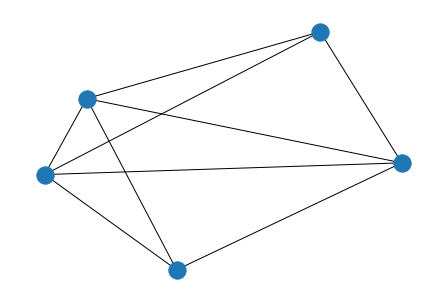

In [7]:
# Sanity check 
for g,p in zip(graphs, properties):
    nx.draw(g)
    print_properties(p)
    break

## LPA Algorithm 
#### Test graphs using LPA algorithm and analyze results

In [8]:
# Install dependency
# !pip install netgraph

In [9]:
from networkx.algorithms import community
from netgraph import Graph
import matplotlib.pyplot as plt
from hcs_module import HCS,labelled_HCS
import csvwriter as cvw

In [13]:
# Helper function to generate node-community dict for netgraph color function
def node_comm_dict(labels):
    out = dict()
    for (node, comm) in enumerate(labels):
        out[node] = comm
    return out


In [14]:
# Choose second graph in the array
G = graphs[4].copy()

In [15]:
# Check the HCS algorithm on a graph
#HCS_G = HCS(G.copy())
itr = community.label_propagation_communities(G)
#node_to_community= node_comm_dict(labels)

cutratio = ev.cut_ratio(G,itr)
avg_internal_density= ev.avg_internal_density(G,itr)
coverage, performance = ev.cov_per(G,itr)
modularity = ev.modularity(G,itr)

print(extract_properties(properties[2]))
print(cutratio, avg_internal_density, coverage, performance, modularity)


[15, 30, 4.0, 0.2857142857142857]
0.02 0.9 0.9 0.9666666666666667 0.7


### Default function to run all graphs and cluster them

In [57]:
from networkx.algorithms import community
import timeit
from IPython.display import clear_output, display
def evaluate_graphs(graphs):
    csvwriter= cvw.CustomCSV(cols=cvw.CustomCSV.ALL_HEADER)
    results = []
    for idx, graph in enumerate(graphs):
        print(idx)
        G = graph.copy()
        
        # Clustering algorithm start
        start = timeit.default_timer()
        itr = community.label_propagation_communities(G)
        exec_time = timeit.default_timer() - start
        # end
        #print(exec_time)
        cutratio = ev.cut_ratio(G,itr)
        modularity = ev.modularity(G,itr)
        avg_internal_density= ev.avg_internal_density(G,itr)
        coverage, performance = ev.cov_per(G,itr)
        node_to_community= node_comm_dict(labels)
        # Num of clusters
        num_of_clusters = len([*itr])
        props = extract_properties(properties[idx])
        results.append([*props,cutratio, avg_internal_density,coverage, performance, modularity,exec_time,num_of_clusters])
        clear_output(wait=True)
    csvwriter.write_to_csv(data=results,filename=csv_save_loc)

evaluate_graphs(graphs=graphs)

> Sucessfully written to ./csvs/LPA_NEW_connected_cavemen_graphs_100.pklnum-clusters ...


In [16]:
node_to_community = dict()
com_id=0
for cluster in itr:
    for node in cluster:
        node_to_community[node]=com_id
        
    com_id+=1
node_to_community

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 4}

c:\Users\sqbis\AppData\Local\Programs\Python\Python39\lib\site-packages\netgraph\_edge_layout.py:761: RuntimeWarning: invalid value encountered in true_divide
  displacement = compatibility * delta / distance_squared[..., None]


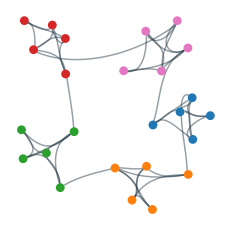

In [17]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink',
    5 : 'tab:cyan',
    6 : 'tab:olive',
    7 : 'tab:purple',
    8 : 'tab:brown'
}
node_color = {node: community_to_color[community_id%8] for node, community_id in node_to_community.items()}

Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()

In [59]:
# Helper function to draw both original and clustered graphs
def plot_graph_and_cluster(G, node_color_dict, key="HCS"):
    '''
      Input:
      G = The original graph
      node_color_dict = The clustered graph node community dict
      key = The name of the clustering algorithm
      
      Output: 
      void 
    '''
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Original Graph and Clustered Graph using '+ key)
    
    # Draw original graph
    nx.draw(G, ax=ax1)
    
    # Draw clusterd graph
    Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled',
      ax=ax2
    )
    plt.show()

In [60]:
#plot_graph_and_cluster(G, node_color)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load csv file containing info
raw = pd.read_csv(f"./csvs/{csv_save_loc}.csv")
raw.head()

,Number of nodes,Number of Edges,Average Degree,Density,Cut-Ratio,Avg. internal density,Coverage,Performance,Modularity,Execution Time,Num of Clusters
0,5,9,3.6,0.900000,0.000000,0.9,1.0,0.900000,0.000000,0.000290,1
1,10,20,4.0,0.444444,0.080000,0.9,0.9,0.911111,0.400000,0.000529,2
2,15,30,4.0,0.285714,0.040000,0.9,0.9,0.942857,0.566667,0.000700,3
3,20,40,4.0,0.210526,0.026667,0.9,0.9,0.957895,0.650000,0.000897,4
4,25,50,4.0,0.166667,0.020000,0.9,0.9,0.966667,0.700000,0.001004,5


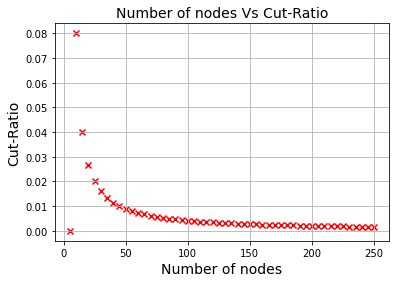

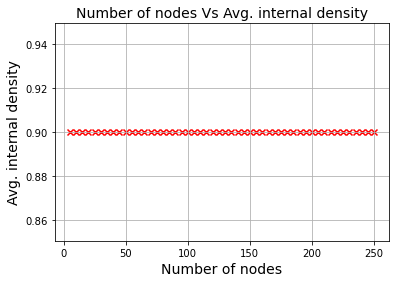

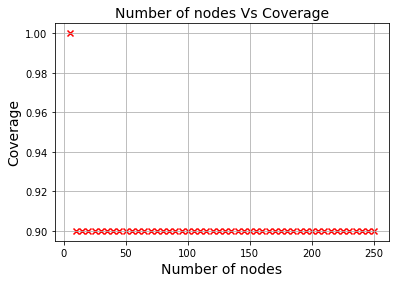

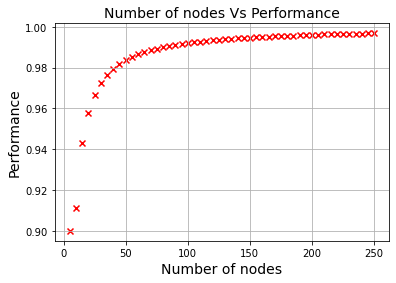

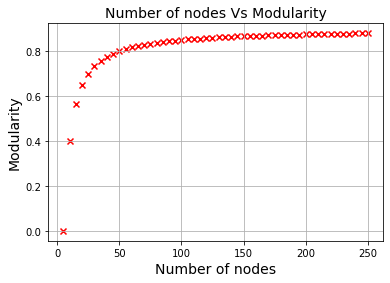

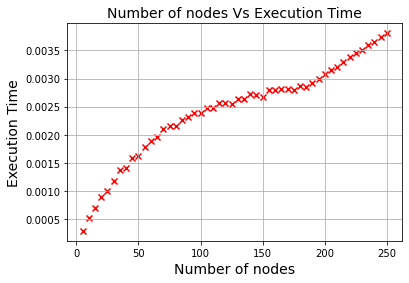

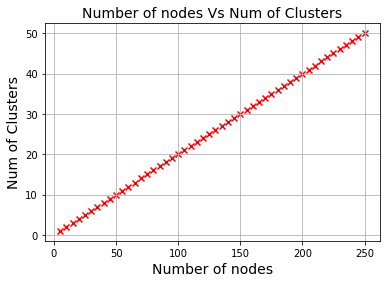

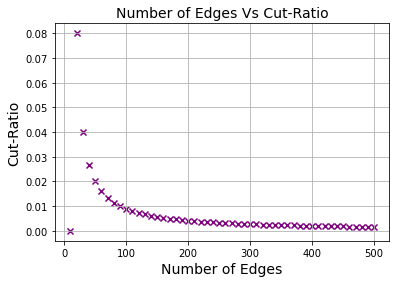

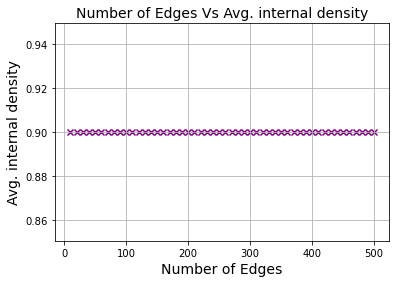

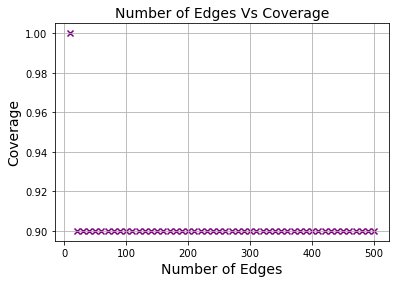

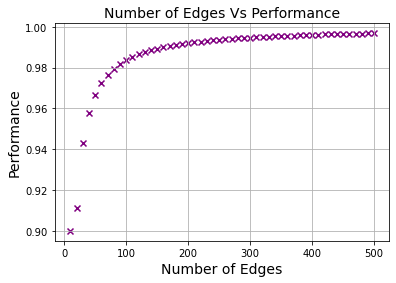

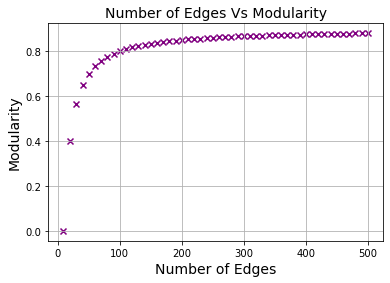

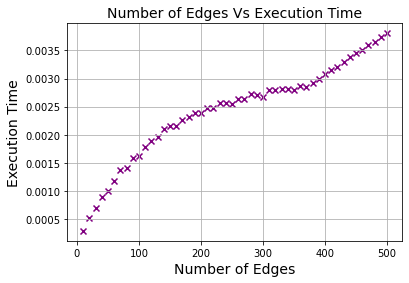

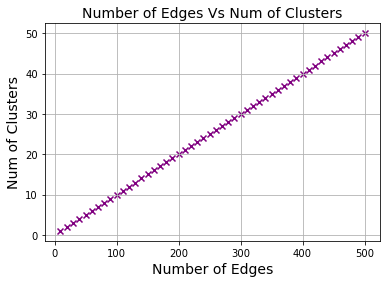

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Visualization for HCS algorithm
# Load csv file containing info
PERFOMANCE_METRICS = cvw.CustomCSV.PERFOMANCE_METRICS

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot node vs density
    plt.figure()
    plt.scatter(raw["Number of nodes"],raw[metric], color='red', marker='x')
    plt.title(f'Number of nodes Vs {metric}', fontsize=14)
    plt.xlabel('Number of nodes', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot edges vs density
    plt.figure()
    plt.scatter(raw["Number of Edges"],raw[metric], color='purple', marker='x')
    plt.title(f'Number of Edges Vs {metric}', fontsize=14)
    plt.xlabel('Number of Edges', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()